# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
url = "https://drive.google.com/uc?export=download&id=1S9qSvh0t247rDW4xuAna1WMnPPQQqUOi"
df = pd.read_csv(url)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

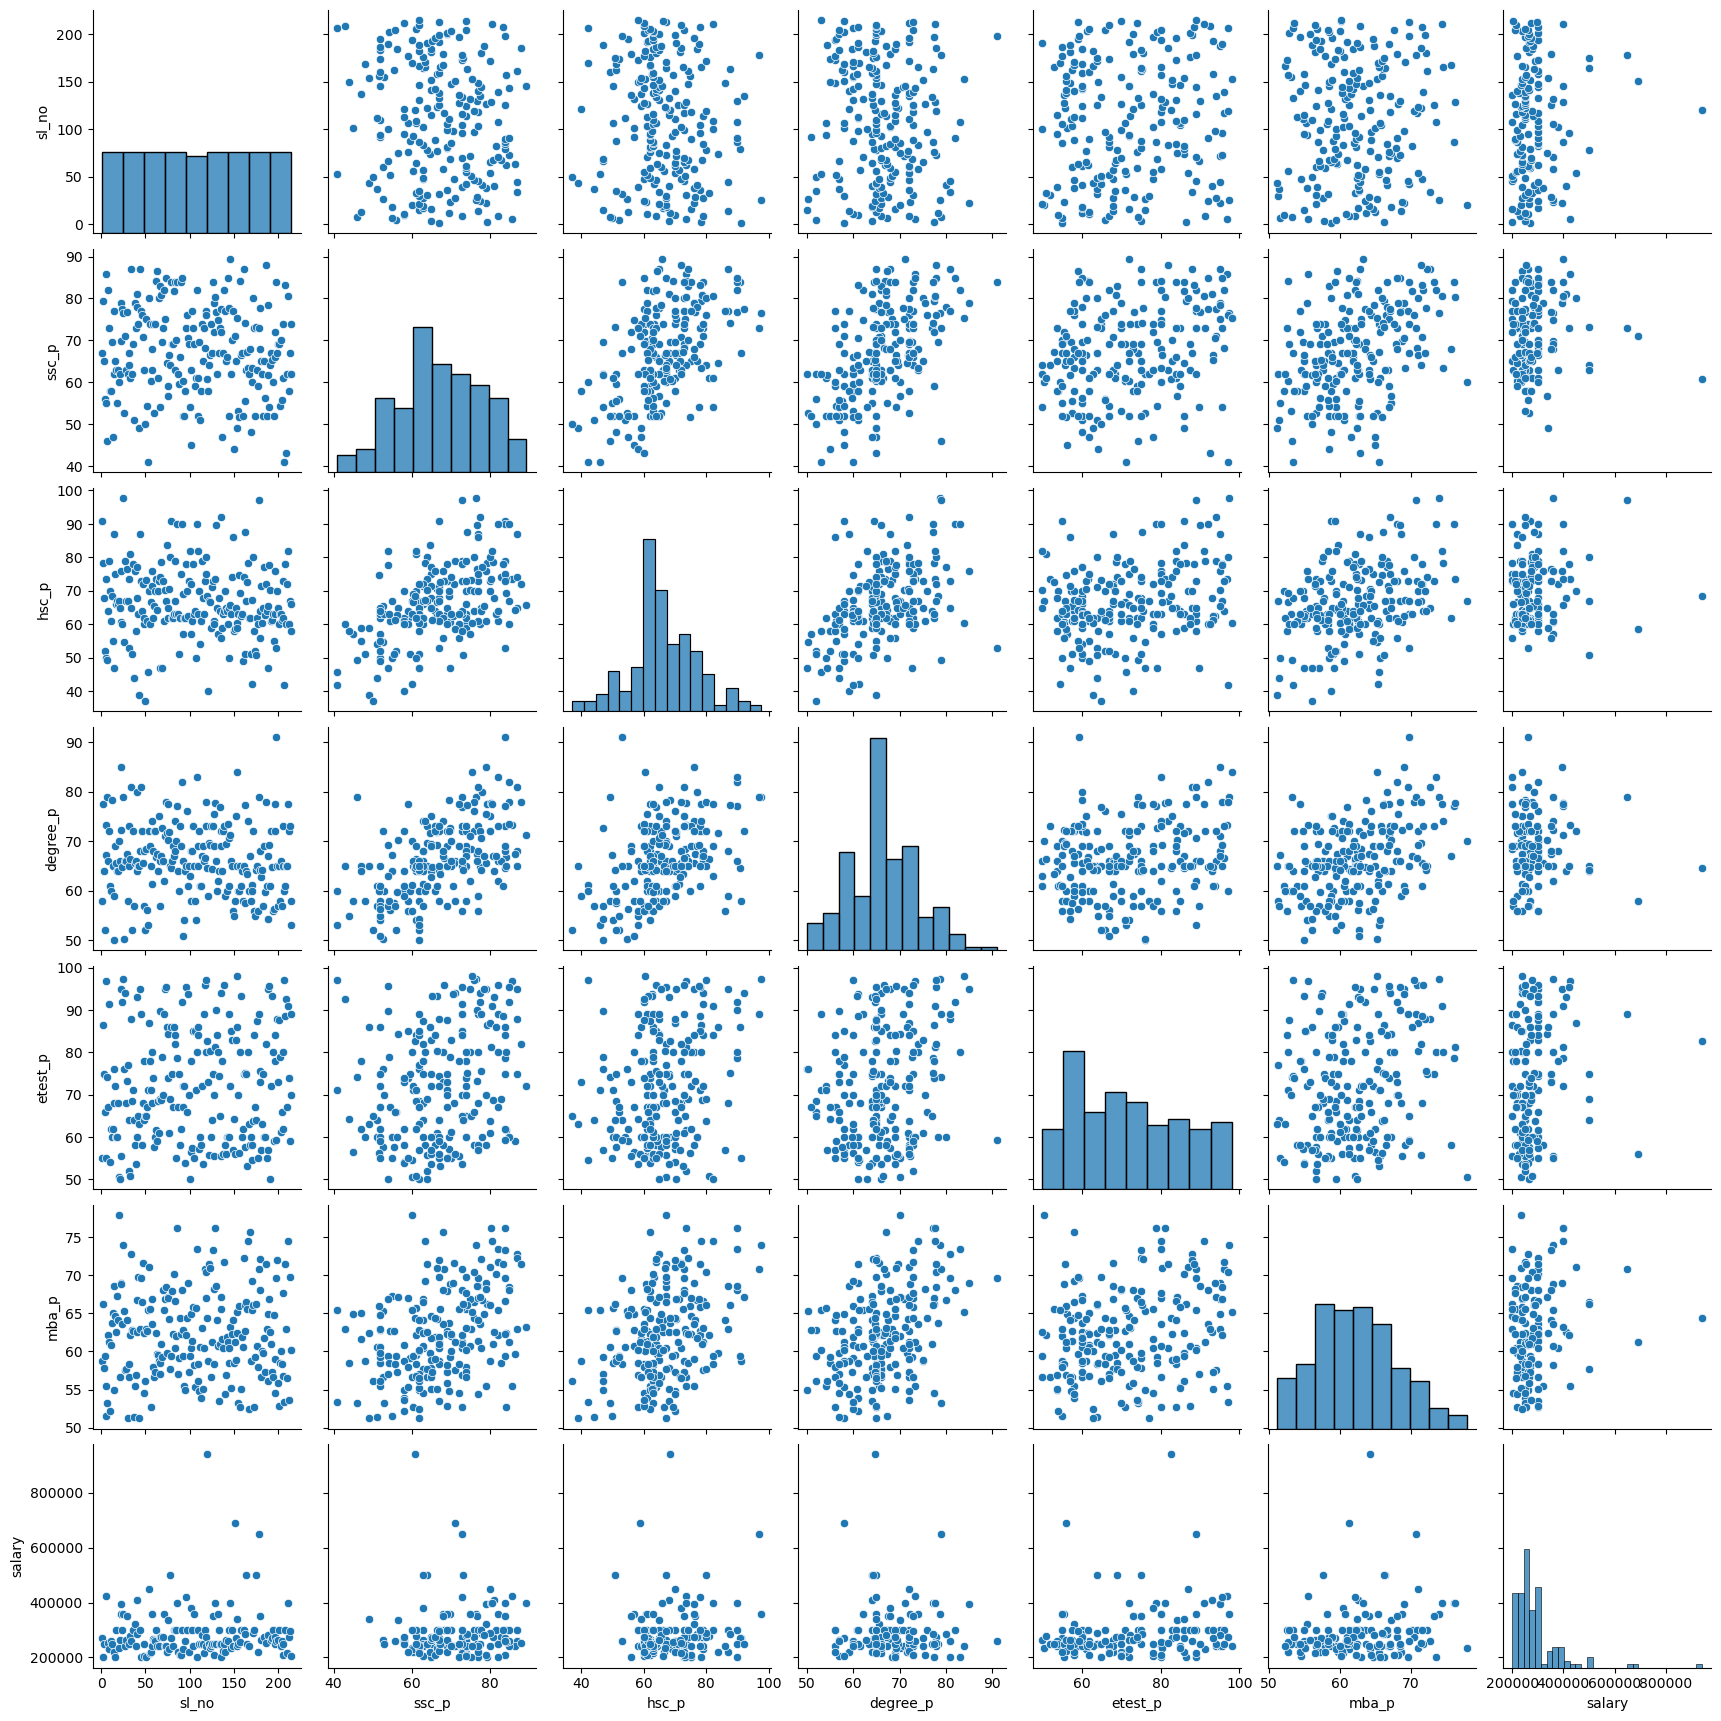

In [7]:
sns.pairplot(df)

In [8]:
# We can now drop the sl_no column from the dataframe since it does not contribute to the analysis.

In [9]:
df.drop('sl_no', axis=1, inplace=True)

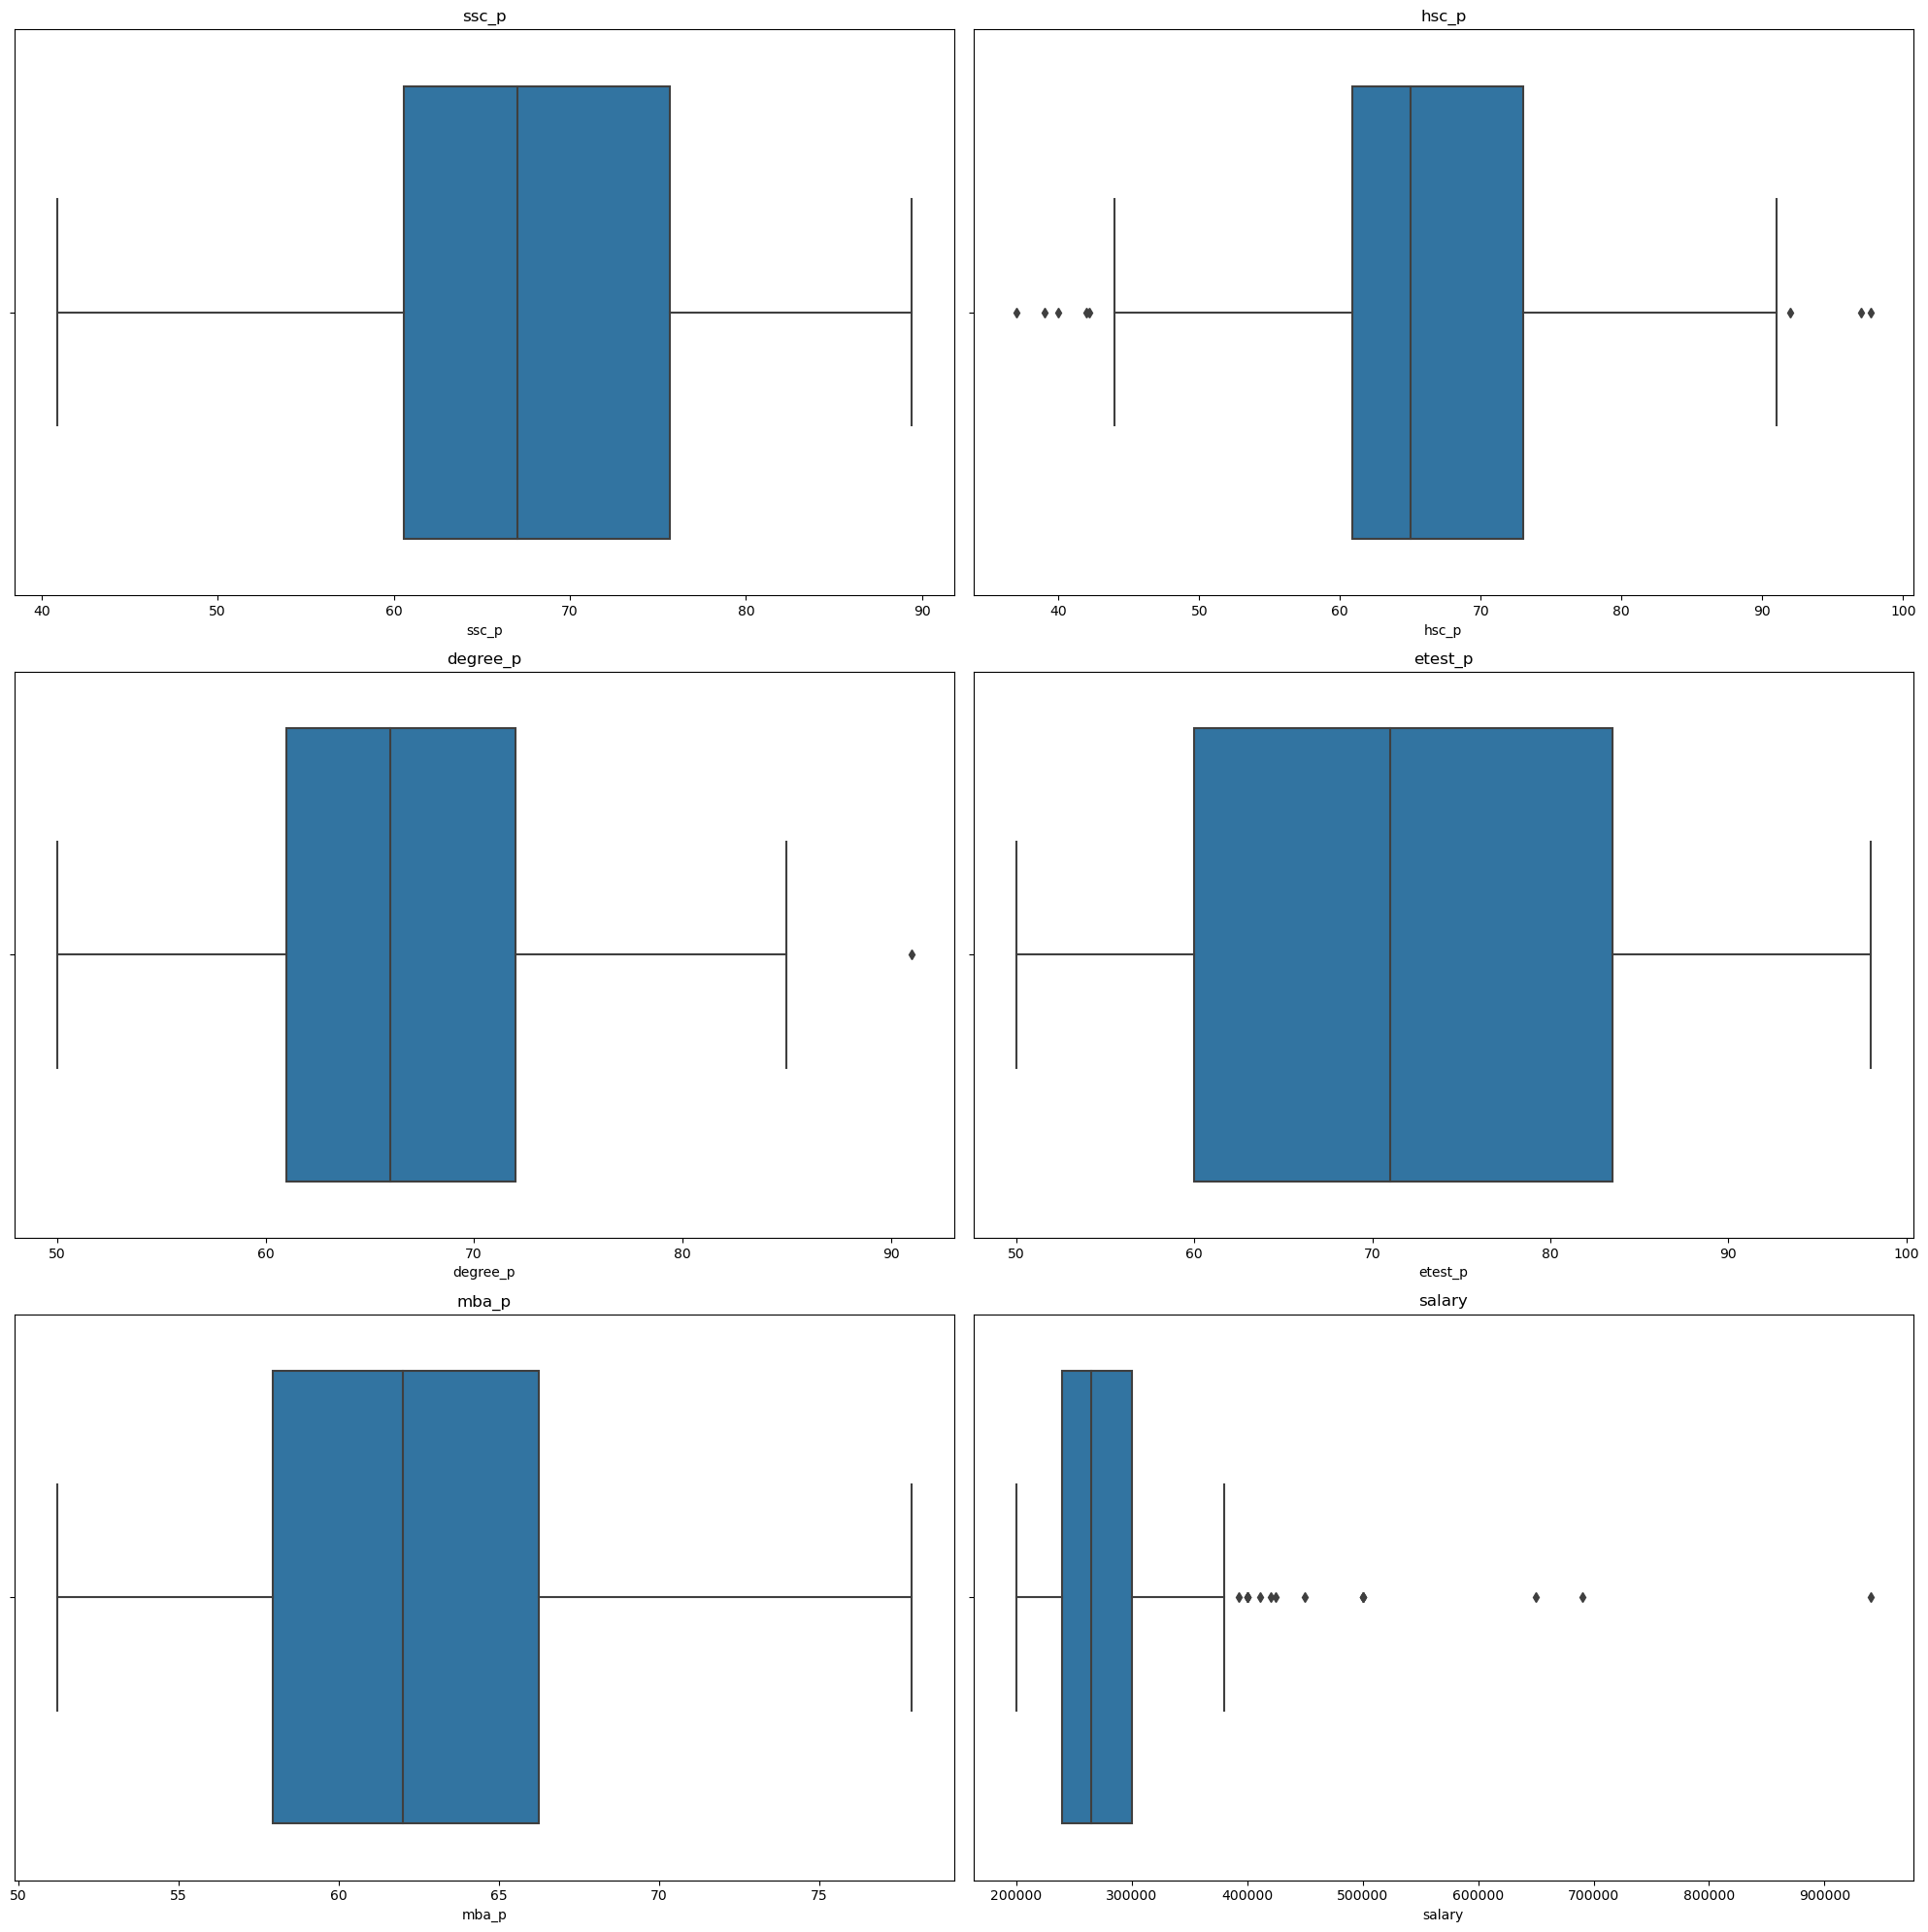

In [10]:
numerical_cols = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numerical_cols.append(column)
fig, axes = plt.subplots(3, len(numerical_cols)//3, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(numerical_cols):
    sns.boxplot(data=df, x=column, ax=axes[i], orient='h')
    axes[i].set_title(column)
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [11]:
# From the plots we can conclude there are outliers in the columns hsc_p, degree_p and salary.

# Preprocessing

In [12]:
# Handling the outliers form the columns hsc_p and degree_p columns.

outliers_rows_hsc_p = []
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for i in range(len(df)):
    if df['hsc_p'][i] < lower_bound or df['hsc_p'][i] > upper_bound:
        outliers_rows_hsc_p.append(i)
outliers_rows_hsc_p

[24, 42, 49, 120, 134, 169, 177, 206]

In [13]:
for i in outliers_rows_hsc_p:
    df.drop(i, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [14]:
outliers_rows_degree_p = []
Q1 = df['degree_p'].quantile(0.25)
Q3 = df['degree_p'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for i in range(len(df)):
    if df['degree_p'][i] < lower_bound or df['degree_p'][i] > upper_bound:
        outliers_rows_degree_p.append(i)
outliers_rows_degree_p

[190]

In [15]:
df.drop(outliers_rows_degree_p, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
202,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
203,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
204,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [16]:
## Now we have removed the outliers from the columns hsc_p and degree_p.
# Handling the categorical variables by using label encoding.

In [17]:
# Label Encoding
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['ssc_b'] = df['ssc_b'].map({'Central': 0, 'Others': 1})
df['hsc_b'] = df['hsc_b'].map({'Central': 0, 'Others': 1})
df['hsc_s'] = df['hsc_s'].map({'Commerce': 0, 'Science': 1, 'Arts': 2})
df['degree_t'] = df['degree_t'].map({'Sci&Tech': 0, 'Comm&Mgmt': 1, 'Others': 2})
df['workex'] = df['workex'].map({'No': 0, 'Yes': 1})
df['status'] = df['status'].map({'Placed': 0, 'Not Placed': 1})
df['specialisation'] = df['specialisation'].map({'Mkt&Fin': 0, 'Mkt&HR': 1})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          206 non-null    int64  
 1   ssc_p           206 non-null    float64
 2   ssc_b           206 non-null    int64  
 3   hsc_p           206 non-null    float64
 4   hsc_b           206 non-null    int64  
 5   hsc_s           206 non-null    int64  
 6   degree_p        206 non-null    float64
 7   degree_t        206 non-null    int64  
 8   workex          206 non-null    int64  
 9   etest_p         206 non-null    float64
 10  specialisation  206 non-null    int64  
 11  mba_p           206 non-null    float64
 12  status          206 non-null    int64  
 13  salary          144 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 22.7 KB


In [19]:
# handling missing values in the salary column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[['salary']])
df['salary'] = imputer.transform(df[['salary']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          206 non-null    int64  
 1   ssc_p           206 non-null    float64
 2   ssc_b           206 non-null    int64  
 3   hsc_p           206 non-null    float64
 4   hsc_b           206 non-null    int64  
 5   hsc_s           206 non-null    int64  
 6   degree_p        206 non-null    float64
 7   degree_t        206 non-null    int64  
 8   workex          206 non-null    int64  
 9   etest_p         206 non-null    float64
 10  specialisation  206 non-null    int64  
 11  mba_p           206 non-null    float64
 12  status          206 non-null    int64  
 13  salary          206 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 22.7 KB


# Splitting the Dataset into training and testing

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 13), (42, 13), (164,), (42,))

# Model Building

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [22]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Bagging Classifier': BaggingClassifier(),
}
voting_classifer = VotingClassifier(estimators = list(models.items()))

In [23]:
# Training the models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    score = cross_val_score(model, X, y, cv=5)
    print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    print("-"*70)

Random Forest
1.0
[[29  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Accuracy: 0.92 (+/- 0.08)
----------------------------------------------------------------------
Logistic Regression
0.6904761904761905
[[29  0]
 [13  0]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        29
           1       0.00      0.00      0.00        13

    accuracy                           0.69        42
   macro avg       0.35      0.50      0.41        42
weighted avg       0.48      0.69      0.56        42

Accuracy: 0.76 (+/- 0.12)
----------------------------------------------------------------------
Decision Tree
0.9285714285714286
[[27  2]
 [ 1 12]]
     

In [24]:
## Gradient Boosting Classifier is giving the best results and hence we can perform hyperparameter tuning.

In [ ]:
# Hyperparameter tuning on Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.0001, 0.001, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth': [3, 7, 9]
}
grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.7, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("-"*70)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
score = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("-"*70)